# House Price Prediction Using Machine Learning

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import mpl_toolkits
import matplotlib.pyplot as py
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
import seaborn as sns
import matplotlib.pyplot as py

In [2]:
dataset = pd.read_csv("C:\\Users\\Shri\\Desktop\\Palak Rathi\\Engineering\\BE\\Semester 8\\Machine Learning\\kc_house_data.csv")

# Step 1 : Exploring Dataset

In [3]:
dataset.shape

(21613, 21)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# Step 2 : Exploratory Data Analysis

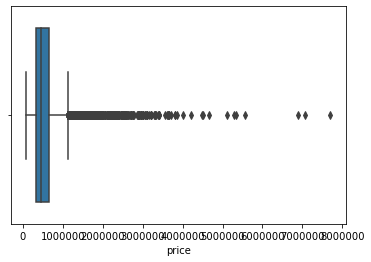

In [7]:
ax = sns.boxplot(x="price", data=dataset)

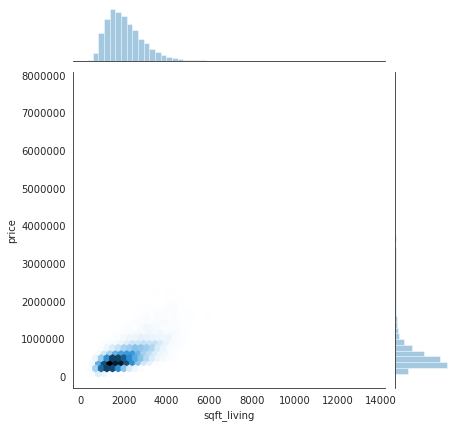

In [8]:
with sns.axes_style('white'):
    sns.jointplot("sqft_living", "price", data=dataset, kind='hex')

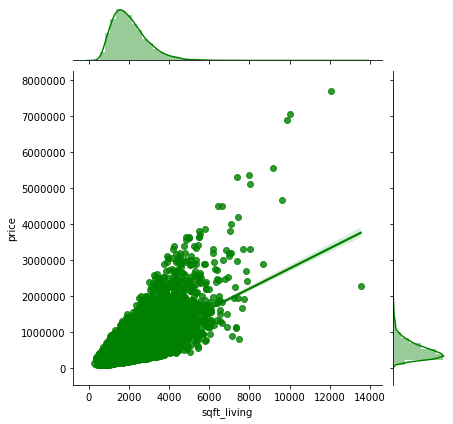

In [46]:
sns.jointplot("sqft_living", "price", data=dataset, kind='reg', color = 'green')

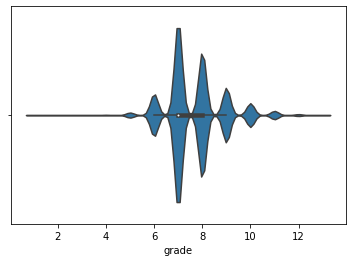

In [44]:
sns.violinplot(x = "grade", data=dataset)

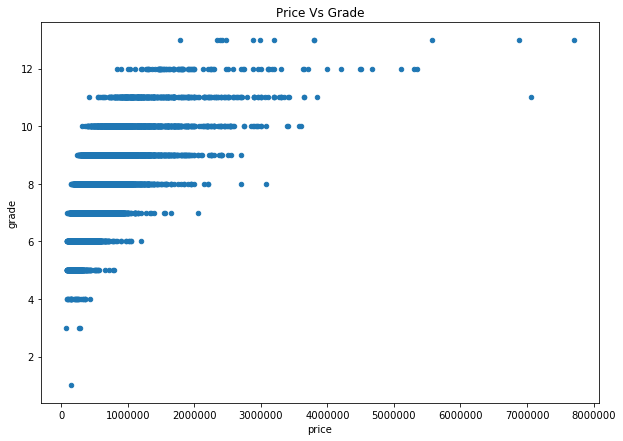

In [41]:
dataset.plot.scatter(x='price', y='grade', title='Price Vs Grade', figsize = (10,7))

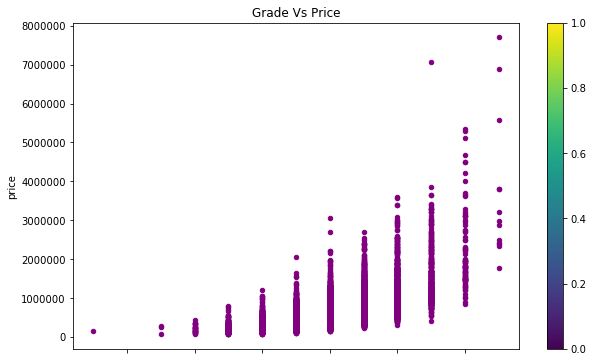

In [45]:
dataset.plot.scatter(x='grade', y='price', title='Grade Vs Price', color = 'purple', colormap='viridis', figsize=(10,6))

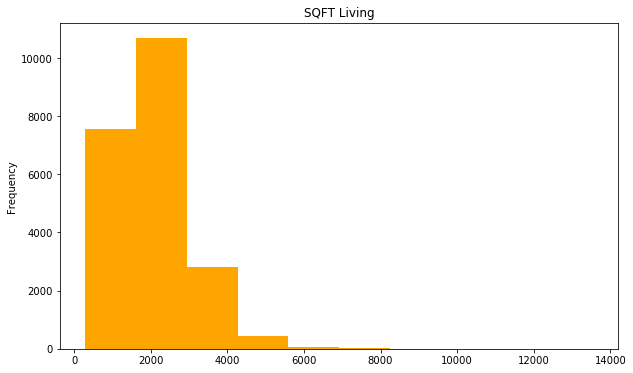

In [39]:
dataset['sqft_living'].plot.hist(color = 'orange', title = 'SQFT Living', figsize=(10,6))

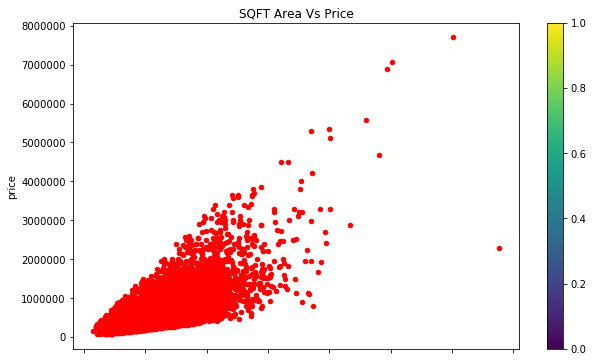

In [40]:
dataset.plot.scatter(x='sqft_living', y='price', title='SQFT Area Vs Price', color = 'red', colormap='viridis', figsize = (10,6))

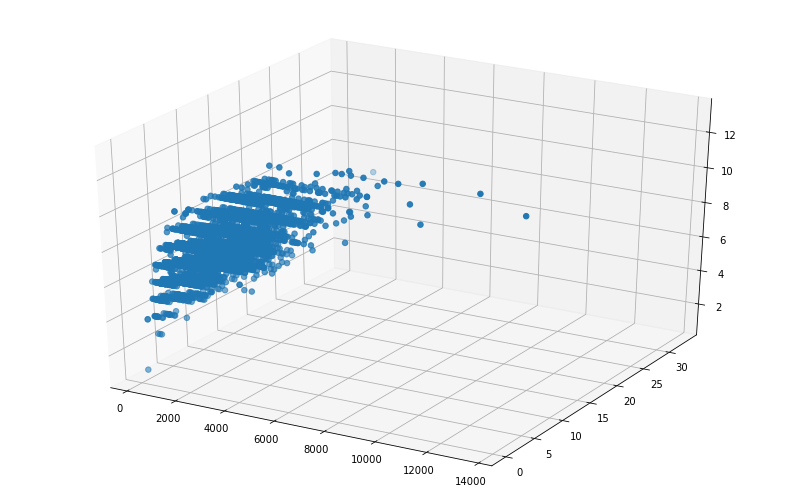

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = py.figure(figsize = (14,9))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(dataset['sqft_living'],dataset['bedrooms'],dataset['grade'], s = 30)
#py.plot()

# Step 3 : Data Pre-Processing (Checking for Null Values)

In [47]:
dataset.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Step 4 : Applying Algorithms

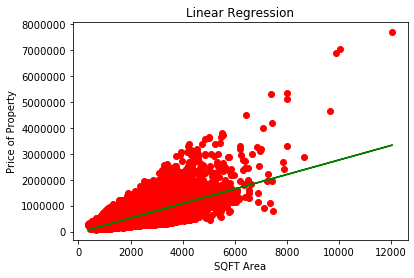

Mean Absolute Error =  174946.94867296674
Mean Squared Error =  69369027265.48276
Root Mean Square Error =  263380.005439826
R2_score =  50.31163805565344 %


In [51]:
#Linear Regression

x = dataset[['sqft_living']]
y = dataset['price']
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2)
reg.fit(x_train, y_train)
lr_pred = reg.predict(x_test)
py.scatter(x_train,y_train, color='red')
py.plot(x_train, reg.predict(x_train), color='green')
py.title('Linear Regression')
py.xlabel('SQFT Area')
py.ylabel('Price of Property')
py.show()

print('Mean Absolute Error = ',metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error = ',metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Square Error = ',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
lr_score = metrics.r2_score(y_test, lr_pred)*100
print('R2_score = ',lr_score, '%')

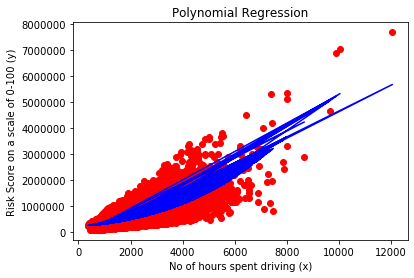

Mean Absolute Error =  166942.4065280884
Mean Squared Error =  63312980075.237335
Root Mean Square Error =  251620.70676960857
Polynomial Linear Regression R2_score =  54.64952596619488 %


In [53]:
#Polynmial Regression

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
py.scatter(x_train, y_train, color='red')
py.plot(x_train, pol_reg.predict(poly_reg.fit_transform(x_train)), color='blue')
py.title('Polynomial Regression')
py.xlabel('No of hours spent driving (x)')
py.ylabel('Risk Score on a scale of 0-100 (y)')
py.show()

plr_pred = pol_reg.predict(poly_reg.fit_transform(x_test))
plr_score = metrics.r2_score(y_test, plr_pred)*100
print('Mean Absolute Error = ',metrics.mean_absolute_error(y_test, pol_reg.predict(poly_reg.fit_transform(x_test))))
print('Mean Squared Error = ',metrics.mean_squared_error(y_test, pol_reg.predict(poly_reg.fit_transform(x_test))))
print('Root Mean Square Error = ',np.sqrt(metrics.mean_squared_error(y_test, pol_reg.predict(poly_reg.fit_transform(x_test)))))
print('Polynomial Linear Regression R2_score = ',plr_score,'%')

In [54]:
#Multiple Linear Regression

x1 = dataset[['sqft_living', 'condition','sqft_lot', 'bathrooms','grade','bedrooms','floors','sqft_above','sqft_basement']]
y1 = dataset['price']
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.3, random_state=2)
reg.fit(x_train, y_train)
mlr_pred = reg.predict(x_test)

mlr_score = metrics.r2_score(y_test, mlr_pred)*100

print('Mean Absolute Error = ',metrics.mean_absolute_error(y_test, mlr_pred))
print('Mean Squared Error = ',metrics.mean_squared_error(y_test, mlr_pred))
print('Root Mean Square Error = ',np.sqrt(metrics.mean_squared_error(y_test, mlr_pred)))
print('Multiple Linear Reression R2_score = ',mlr_score,'%')

Mean Absolute Error =  159547.79941117094
Mean Squared Error =  61677185672.344215
Root Mean Square Error =  248348.9192091325
Multiple Linear Reression R2_score =  55.73212961949585 %


In [52]:
#Used Dimensionality Reduction Algorithm (Principal Component Analysis) and applied Multiple Linear Regression

x1 = dataset[['sqft_living', 'condition','sqft_lot', 'bathrooms', 'condition','yr_renovated','grade','bedrooms','floors','lat', 'long','sqft_above','sqft_basement']]
y1 = dataset['price']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size = 0.1, random_state=3)

pca = PCA(10)
X_train = pca.fit_transform(x_train1)
X_test = pca.transform(x_test1)

regressor = LinearRegression()
regressor.fit(X_train, y_train1)
mlr_pca_pred = regressor.predict(X_test)

linear_pca_reg = metrics.r2_score(y_test1, mlr_pca_pred)*100
print('Multiple Linear Regression using PCA R2_score = ',linear_pca_reg, '%')

Multiple Linear Regression using PCA R2_score =  65.03821054805856 %


In [55]:
#Decision Tree Regressor

dec_reg = DecisionTreeRegressor(random_state = 1, max_leaf_nodes = 10)
x_train2, x_test2, y_train2,y_test2 = train_test_split(x1, y1, test_size = 0.2, random_state = 2)
dec_reg.fit(x_train2, y_train2)
dec_pred = dec_reg.predict(x_test2)
decReg_score = metrics.r2_score(y_test2, dec_pred)*100
print('Decision Tree Regressor r2_score = ', decReg_score)

Decision Tree Regressor r2_score =  51.39874460483816


In [56]:
#Enseble Model Using LinearRegression and DecisionTreeRegressor

r1 = LinearRegression()
r2 = DecisionTreeRegressor(random_state=1)

x = dataset[['sqft_living', 'condition','sqft_lot', 'bathrooms', 'condition','yr_renovated','grade','bedrooms','floors','lat', 'long','sqft_above','sqft_basement']]
y = dataset['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=2)

er = VotingRegressor([('lr', r1), ('rf', r2)])
er.fit(x_train, y_train).predict(x_test)

voting_reg_score = er.score(x_test, y_test)*100
voting_reg_score

73.7209471936458

# Visualizing Results of all the applied Algorithms 

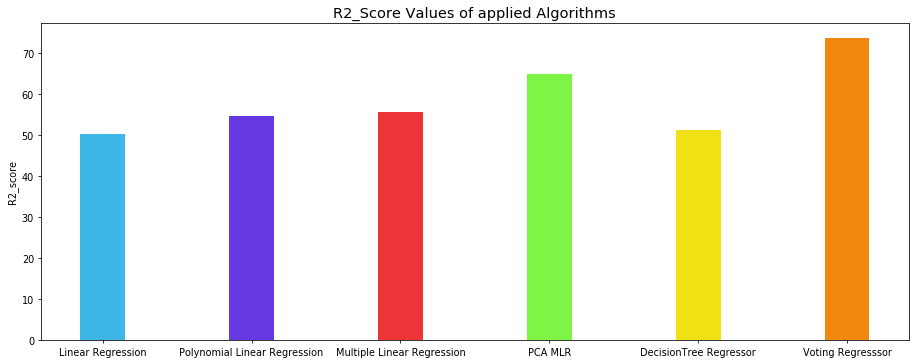

In [57]:
values2 = [lr_score, plr_score, mlr_score, linear_pca_reg, decReg_score, voting_reg_score]
labels2 = ['Linear Regression', 'Polynomial Linear Regression', 'Multiple Linear Regression','PCA MLR', 'DecisionTree Regressor', 'Voting Regresssor']
colors2 = ['#3cb7e8', '#6639e3', '#ed3437', '#7ef544','#f0e114','#f2870f']
plt.figure(figsize=(16,6), dpi= 70)
plt.bar(labels2,values2, color=colors2, width=.3)
plt.title("R2_Score Values of applied Algorithms", fontsize=15)
plt.ylabel('R2_score')
plt.show()